<div class="alert alert-block alert-info">
    <h1> Bike Sharing Assignment (Linear Regression) </h1>
</div>

<img src="https://www.popsci.com/resizer/NEQFfrLTRizAfvI9zIjAUbtglRI=/760x578/arc-anglerfish-arc2-prod-bonnier.s3.amazonaws.com/public/73W3S3FHN2Z5GYBKO3BLWFCT2Y.jpg">


### Table of Contents

* [Problem Statement](#section1)
    * [Project Brief](#section101)
    * [Business Understanding](#section102)
    * [Business Objective](#section103)
    * [Business Goal](#section104) 
* [Data Loading and Description](#section2)
    * [Importing Packages](#section201)
    * [Importing the Dataset](#section202)
* [Data Cleaning and Manipulation](#section3)
    * [Inspecting Null Values](#section301)
    * [Datatype Correction](#section304)
    * [Standardizing Values](#section305)
    * [Drop Features](#section306)
    * [Extract new Features](#section307)
* [Exploratory Data Analysis](#section4)
    * [Feature Categorization](#section403)   
    * [Visualising the Data](#section401)
        * [Visualising Numeric Variables](#section4011)
        * [Correlation between Numerical Attributes](#section4012)
        * [Visualising Categorical Variables](#section4013)    
* [Data Preparation](#section5)
    * [One Hot Encode Categorical Features](#section501)
    * [Dropping unnecessary Columns](#section502)
    * [Splitting the Data into Training and Testing Sets](#section503)
    * [Rescaling the Features ](#section504)
    * [Dividing into X and Y sets for the model building](#section505)
* [Building a linear model](#section6)
    * [Build a Manual Model](#section601)
    * [Residual Analysis of the train data](#section602)
    * [Making Predictions Using the Manual Model](#section603)
    * [Model Evaluation](#section604)
* [Building model with RFE (Recursive feature elimination)](#section7)
    * [Building RFE model](#section701)
    * [Residual Analysis of the train data](#section702)
    * [Making Predictions Using the RFE Model](#section703)
    * [Model Evaluation](#section704)
* [Model Comparison](#section8)
* [Final Verdict on the Model](#section9)
* [Conclusion](#section10)
* [Recommendations](#section11)

<a id=section1></a>
# Problem Statement

<a id=section101></a>
## Project Brief

A `US bike-sharing provider` __`BoomBikes`__ has recently suffered considerable ___dips in their revenues___ due to the ongoing __Corona pandemic__. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a __mindful business plan__ to be able to __accelerate its revenue__ as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes ___aspires to understand the demand for shared bikes___ among the people after this ongoing quarantine situation ends across the nation due to Covid-19.


<a id=section102></a>
## Business Understanding

- A `bike-sharing system` is a service in which bikes are ___made available___ for shared use to individuals on a short term basis for a `price` or `free`. 
- Many bike share systems allow people to ___borrow a bike___ from a ___"dock"___ which is usually `computer-controlled` wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


<a id=section103></a>
## Business Objective

The __`objective`__ of the company is to __`understand the factors`__ on which the demand for these shared bikes depends. Specifically, they want to __`understand the factors affecting the demand`__ for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands



<a id=section104></a>
## Business Goal

The `goal` is to model the ___demand for shared bikes___ with the ___available independent variables___. It will be `used by the management` to __understand how exactly the demands vary with different features__. 

They can accordingly `manipulate the business strategy` to meet the __demand levels__ and meet the __customer's expectations__. Further, the model will be a good way for management to `understand the demand dynamics of a new market. `

<a id=section2></a>
# Data Loading and Description

Based on various meteorological surveys and people's styles, the `service provider firm` has gathered a large dataset on __`daily bike demands across the American market based on some factors`__.
<br>
The dataset provided contains `730` Observations and `16` features.

<a id=section201></a>
### Importing Packages

In [1]:
#Importing Packages
import numpy as np                                  # Implements milti-dimensional array and matrices
import pandas as pd                                 # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                     # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                               # Provides a high level interface for drawing attractive and informative statistical graphics
import math
%matplotlib inline
sns.set()

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm 

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)  #Setting option to display max columns
pd.set_option('display.max_rows', None)  #Setting option to display max columns



<a id=section202></a>
### Importing the Dataset

In [2]:
#Importing dataset 
bike=pd.read_csv('day.csv')
bike.head()        #Checking the top 5 records in the Bike dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape  #Checking Bike shape

(730, 16)

In [4]:
bike.info(verbose=True, null_counts=True) #Checking Bike info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- We can clearly see there are no `missing values` in the dataset. But, let's explore more.
- dteday is a `date` field and needs to be changed to `datetime` datatype

In [5]:
bike.describe()   #Check bike describe

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- __temp & atemp__ looks normally distributed with mean and median very close to each other
- There is some skewness in __hum & windspeed__ as we see sudden rise of data from 0% to 25% in __hum__ and from 75% to 100% in __windspeed__
- __instant__ is a unique field and should be dropped 

<a id=section3></a>
# Data Cleaning and Manipulation

<img src="https://miro.medium.com/focal/1200/1200/48/59/1*wK8k8Vo8_c6jdYIjUWL_Pw.png" style="width: 500px; height: 450px;">



In [6]:
bike.columns  #Check columns for Bike DataFrame

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<a id=section301></a>
##  Inspecting Null Values

In [7]:
#Check for null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There is no missing values in the dataset

<a id=section304></a>
## Datatype Correction

In [8]:
#Check Datatype for bike Dataframe
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#Checking data for Columns which might needs Datatype Correction
bike.dteday.head()

0    01-01-2018
1    02-01-2018
2    03-01-2018
3    04-01-2018
4    05-01-2018
Name: dteday, dtype: object

In [10]:
#Making Corrections to Datatype
bike['dteday'] = pd.to_datetime(bike['dteday'],format = "%d-%m-%Y")

In [11]:
#Check the datatype after the correction
bike[['dteday']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dteday  730 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [12]:
#Checking data for Corrected Columnn
bike.dteday.head()

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: dteday, dtype: datetime64[ns]

<a id=section305></a>
## Standardizing values

We will try to standardize few columns for the ease of our future analysis

#### Standardize weathersit Status

In [13]:
bike.weathersit.unique() #Check Unique values

array([2, 1, 3])

In [14]:
#Map specific labels associated with them
bike['weathersit']=bike.weathersit.map({1:'Clear/PartlyCloudy',
                                        2:'Mist/Cloudy/BrokenClouds',
                                        3:'LightSnow/Rain&Storm/ScatteredClouds',
                                        4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

In [15]:
bike.weathersit.unique() #Check Unique values again

array(['Mist/Cloudy/BrokenClouds', 'Clear/PartlyCloudy',
       'LightSnow/Rain&Storm/ScatteredClouds'], dtype=object)

#### Standardize season Status

In [16]:
bike.season.unique() #Check Unique values

array([1, 2, 3, 4])

In [17]:
#Map specific labels associated with them
bike['season']=bike.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [18]:
bike.season.unique() #Check Unique values again

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

#### Standardize month

In [19]:
bike.mnth.unique() #Check Unique values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [20]:
#Map respective month labels associated with them
bike['mnth']=bike.mnth.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',
                              8:'August',9:'September',10:'October',11:'November',12:'December'})

In [21]:
bike.mnth.unique() #Check Unique values again

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

#### Standardize weekday

In [22]:
bike.weekday.unique() #Check Unique values

array([6, 0, 1, 2, 3, 4, 5])

In [23]:
#Check minimum Date record
bike[bike.dteday==bike.dteday.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,January,0,6,0,Mist/Cloudy/BrokenClouds,14.110847,18.18125,80.5833,10.749882,331,654,985


#### After checking day of the week in the Calendar for 1st Jan 2018 shows Monday with a weekday 6
#### So, we will assign following day of the week for the remaining weekday values

0 - Tuesday
1 - Wednesday
2 - Thursday
3 - Friday
4 - Saturday
5 - Sunday
6 - Monday

In [24]:
#Map respective weekday labels associated with them
bike['weekday']=bike.weekday.map({0:'Tuesday',1:'Wednesday',2:'Thursday',3:'Friday',4:'Saturday',5:'Sunday',6:'Monday'})

In [25]:
bike.weekday.unique() #Check Unique values again

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

<a id=section306></a>
## Drop Features

As we can see, the bike dataset contains some features which may not be needed for this problem e.g.

instant - This is just an index holder.

casual - It contains the count of casual bike riders, which are already included in the overall users count i.e. 'cnt', hence not needed.

registered - It contains the registered bike riders, which again, like the casual riders, are already included in the overall users count i.e. 'cnt', hence not needed.

Since, these features are not needed for our current problem, let us drop them from the bike data set.

In [26]:
#Drop Unwanted Features
bike.drop(['instant','casual','registered'],inplace=True,axis=1)

In [27]:
#Check bike shape
bike.shape

(730, 13)

<a id=section307></a>
## Extracting new Features

Let's try to extract some new features from the existing ones

In [28]:
#Extract Year-Month from Date
bike['yr_mnth'] = bike['dteday'].dt.to_period('M')

In [29]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
bike['weekend']=bike['weekday'].apply(lambda x: 1 if (x=='Saturday' or x=='Sunday') else 0)

In [30]:
bike.head(7)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,yr_mnth,weekend
0,2018-01-01,spring,0,January,0,Monday,0,Mist/Cloudy/BrokenClouds,14.110847,18.18125,80.5833,10.749882,985,2018-01,0
1,2018-01-02,spring,0,January,0,Tuesday,0,Mist/Cloudy/BrokenClouds,14.902598,17.68695,69.6087,16.652113,801,2018-01,0
2,2018-01-03,spring,0,January,0,Wednesday,1,Clear/PartlyCloudy,8.050924,9.47025,43.7273,16.636703,1349,2018-01,0
3,2018-01-04,spring,0,January,0,Thursday,1,Clear/PartlyCloudy,8.200000,10.60610,59.0435,10.739832,1562,2018-01,0
4,2018-01-05,spring,0,January,0,Friday,1,Clear/PartlyCloudy,9.305237,11.46350,43.6957,12.522300,1600,2018-01,0
5,2018-01-06,spring,0,January,0,Saturday,1,Clear/PartlyCloudy,8.378268,11.66045,51.8261,6.000868,1606,2018-01,1
6,2018-01-07,spring,0,January,0,Sunday,1,Mist/Cloudy/BrokenClouds,8.057402,10.44195,49.8696,11.304642,1510,2018-01,1


<a id=section4></a>
# Exploratory Data Analysis

Now we proceed towards the exploratory data analysis of the the data

![title](EDA1.jpg)

<a id=section403></a>
## Feature Categorization

#### Before we start with EDA let's find and define below variable types for the ease of our analysis:
- Quntitative Variables
    - Discrete Variables
    - Continuous Variables
- Qualitative Variables
    - Ordinal Variables
    - Nominal Variables

In [31]:
#Find the number of Numerical and Categorical Columns
num_col=[x for x in bike.columns if bike[x].dtypes != 'O']
print ('Total Number of Numerical Columns: ', len(num_col))
qual_col=[x for x in bike.columns if bike[x].dtypes == 'O']
print ('Total Number of Categorical Columns: ', len(qual_col))

Total Number of Numerical Columns:  11
Total Number of Categorical Columns:  4


In [32]:
#Find Discrete Features
discrete_feature= [x for x in num_col if len(bike[x].unique())<=25]
discrete_feature

['yr', 'holiday', 'workingday', 'yr_mnth', 'weekend']

In [33]:
#Find Continuous Features
continuous_feature= [x for x in num_col if x not in discrete_feature]
continuous_feature

['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [34]:
qual_col  #Check Categorical Features

['season', 'mnth', 'weekday', 'weathersit']

<a id=section401></a>
## Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here we will also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

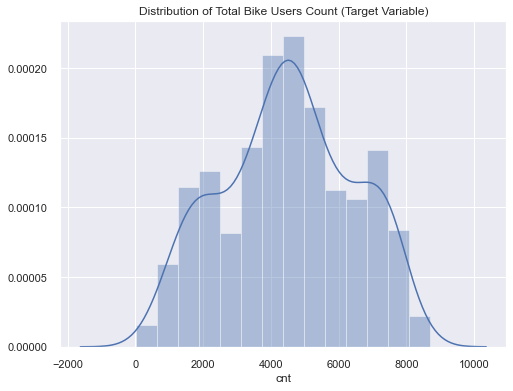

In [35]:
#Check the Distribution of Target Variable
plt.figure(figsize=(8,6))
sns.distplot(bike['cnt'])
plt.title('Distribution of Total Bike Users Count (Target Variable)')
plt.show()

The distribution of Count looks __symmetrical__ and is good enough to proceed for __Multiple Linear Regression__
<br>
Please note that training a linear regression model does not require that the explanatory or target variable to be normally distributed. The normality assumption is only a requirement for certain statistical tests and hypothesis tests.

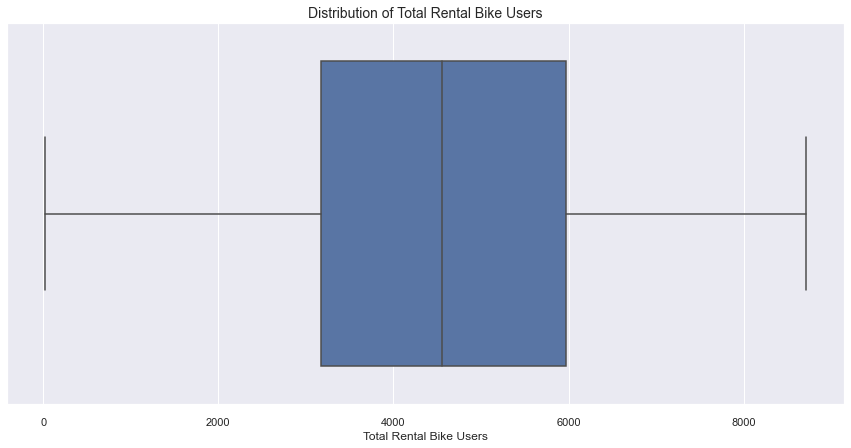

In [36]:
#Plotting distribution plots for Total Bike Users Count
f,ax = plt.subplots(figsize=(15,7))
sns.boxplot(bike.cnt, ax=ax)
ax.set_title('Distribution of Total Rental Bike Users',fontsize=14)
ax.set_xlabel('Total Rental Bike Users')
plt.show()

There doesnt seem to be any outliers in the Target Variable

#### Distribution of Bike Rental Users over the period of two years

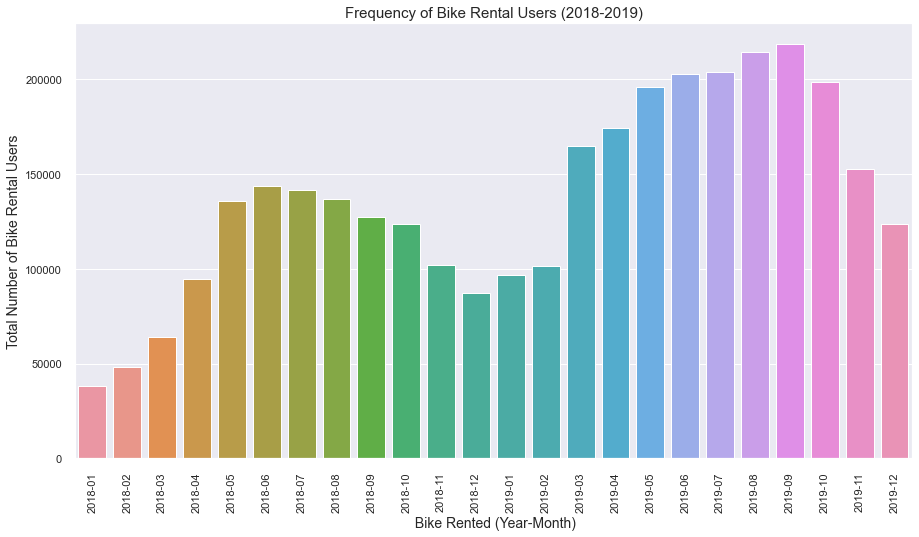

In [37]:
#Plot Distribution of Frequency of Bike Users from 2018 to 2019

f,ax = plt.subplots(figsize=(15,8))
bike_yr_mnth_usr = pd.DataFrame(bike.groupby('yr_mnth')['cnt'].sum())
bike_yr_mnth_usr.reset_index(inplace=True)
sns.barplot(x="yr_mnth",y='cnt', data=bike_yr_mnth_usr,ax=ax)
plt.title('Frequency of Bike Rental Users (2018-2019)', fontsize=15)
plt.ylabel('Total Number of Bike Rental Users',fontsize=14)
plt.xlabel(' Bike Rented (Year-Month)',fontsize=14)
plt.xticks(rotation=90)

plt.show()

- We see a steady increase in demand in the Year 2018 and then it falls in the month of Novemeber and December and it could be because of harsh winter conditions.
- We again observe an increase in demand in the Year 2019 from Jan till September and then we see a steady fall for the month of October, November and December.

<a id=section4011></a>
###  Visualising Numeric Variables

Let's compare Numerical Variables with Target Variable (cnt)

<Figure size 1440x576 with 0 Axes>

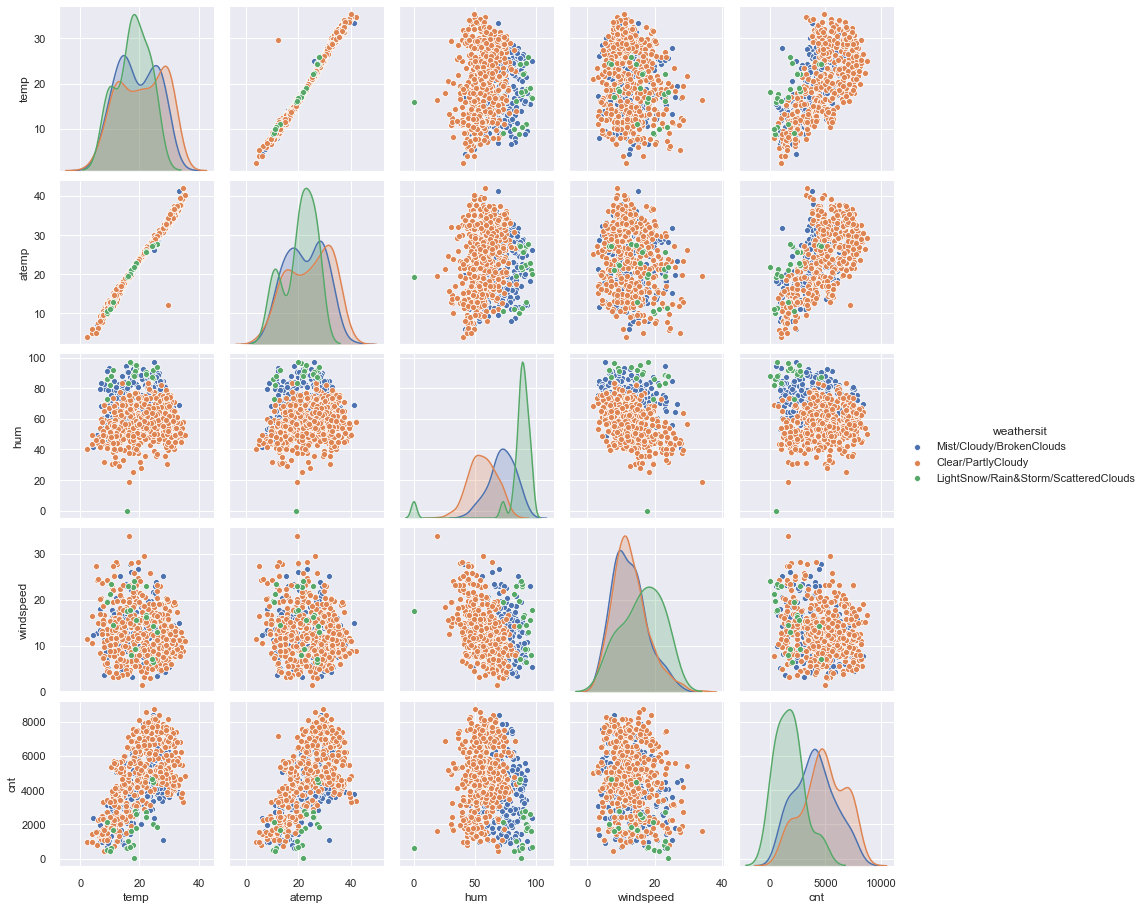

In [38]:
#Comparing Continuous Numerical Features 
plt.figure(figsize=(20,8))
cols=['temp','atemp','hum','windspeed','cnt']
sns.pairplot(bike,vars=cols,hue='weathersit')
plt.show()

- __temp__ and __atemp__ shows some kind of ___positive Linear Relationship___ with the target variable which means Linear Regression can be applied to the problem statement.
- __humidity__ and __windspeed__ shows some kind of negative Linear Relationship with the target variable
- __Clear Weather__ or __Partly Cloudy weather__ does motivate people to rent bikes more as we clearly see increase in Bike users count

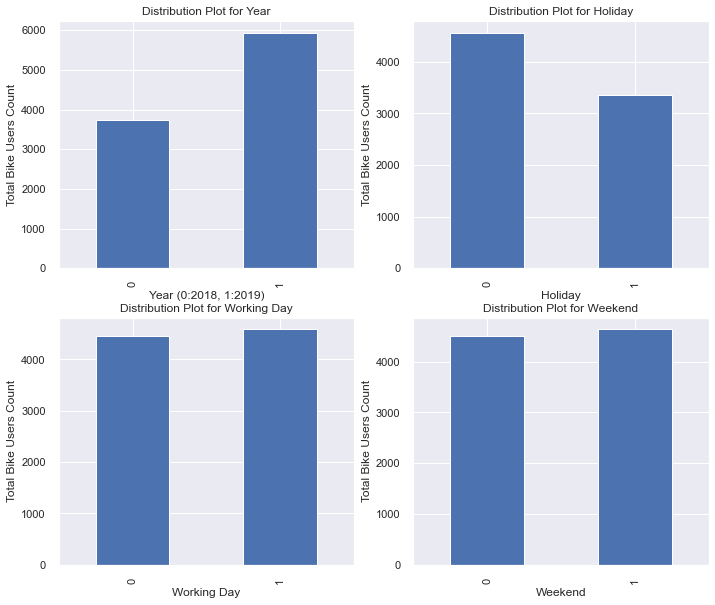

In [39]:
#Comparing Discrete Numerical columns with Count
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
bike.groupby('yr')['cnt'].median().plot.bar()
plt.ylabel('Total Bike Users Count')
plt.xlabel('Year (0:2018, 1:2019)')
plt.title('Distribution Plot for Year')
plt.subplot(2,3,2)
bike.groupby('holiday')['cnt'].median().plot.bar()
plt.ylabel('Total Bike Users Count')
plt.xlabel('Holiday')
plt.title('Distribution Plot for Holiday')
plt.subplot(2,3,4)
bike.groupby('workingday')['cnt'].median().plot.bar()
plt.ylabel('Total Bike Users Count')
plt.xlabel('Working Day')
plt.title('Distribution Plot for Working Day')
plt.subplot(2,3,5)
bike.groupby('weekend')['cnt'].median().plot.bar()
plt.ylabel('Total Bike Users Count')
plt.xlabel('Weekend')
plt.title('Distribution Plot for Weekend')

plt.show()

- Year __2019__ seems to have more total Bike users count in comparison with Year 2018

- We can also see there are more users who use bike on a non-holiday which means they might be using while commuting for work or day to day activities

- We see a very slight difference in Bike Rental count for __workingday__ and __weekend__

#### Distribution Plots for Numeric Fields

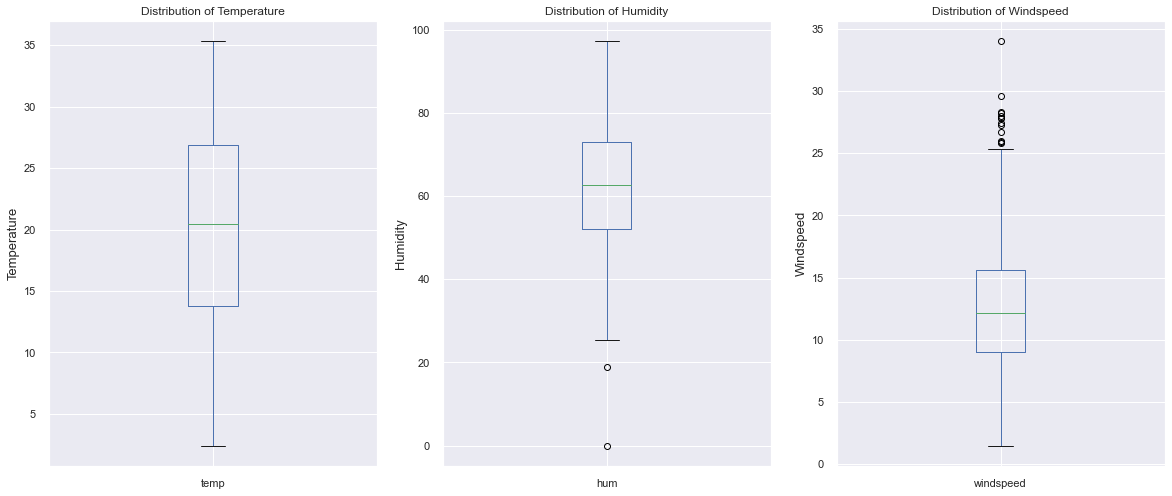

In [40]:
#plotting distribution plots for humidity, temperature and windspeed
plt.figure(figsize=(20, 18))
plt.subplot(2,3,1)
#Plotting Box plot for Temperature
bike.temp.plot.box()
plt.ylabel('Temperature',fontsize=13)
plt.title('Distribution of Temperature')
plt.subplot(2,3,2)
#Plotting Box plot for Humidity
bike.hum.plot.box()
plt.ylabel('Humidity',fontsize=13)
plt.title('Distribution of Humidity')
plt.subplot(2,3,3)
#Plotting Box plot for Windspeed
bike.windspeed.plot.box()
plt.ylabel('Windspeed',fontsize=13)
plt.title('Distribution of Windspeed')
plt.show()

- Average Temperature is ~20 degree celsius with no outliers
- Average Humidity is ~63 with some skewness towards left which shows probable outliers
- Average windspeed is ~12 with some skewness towards right which shows probable outliers

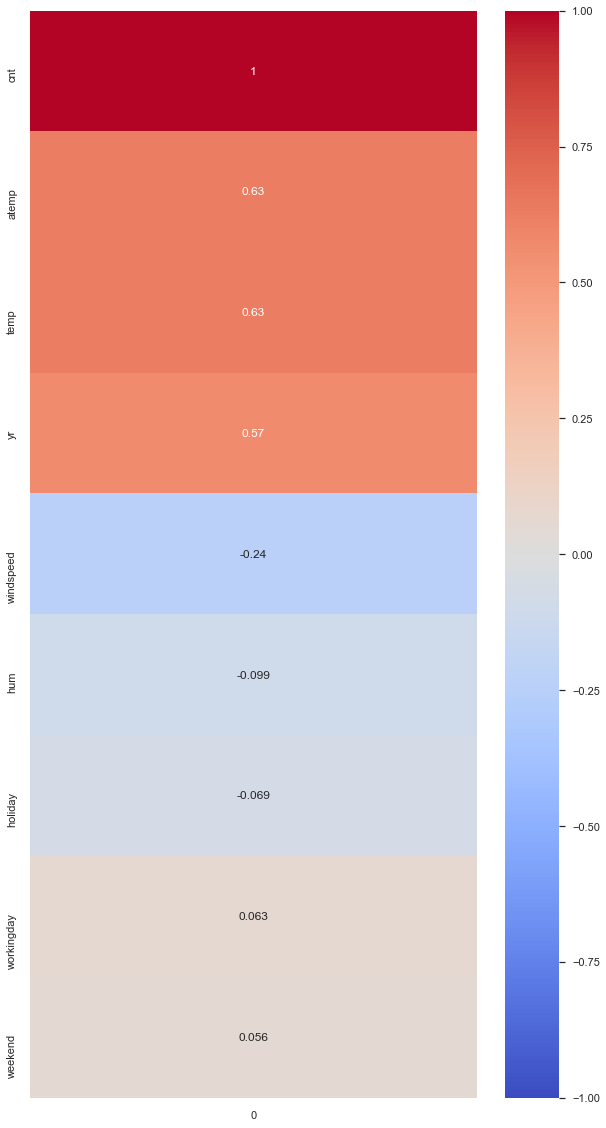

In [41]:
#Checking Correlation of Count with other numerical attributes
correlations = bike.corrwith(bike['cnt']).iloc[:].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

- __temp__ and __atemp__ have the highest correlation with the Target Variable

<a id=section4012></a>
### Correlation between Numerical Attributes

Lets create a heatmap to check the correlation between the independent variables

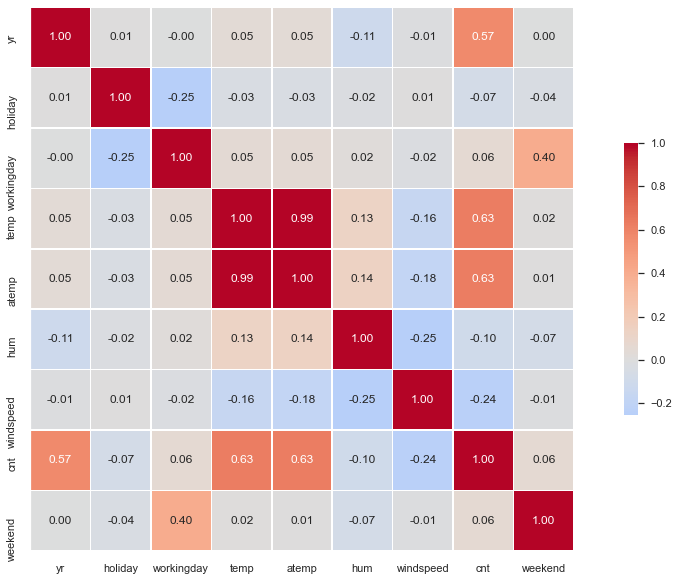

In [42]:
#Correlation between numerical attributes 
plt.figure(figsize=(20,10))
corr = bike.corr()
g = sns.heatmap(corr,  vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f', cmap='coolwarm',annot=True)
sns.despine()
g.figure.set_size_inches(18,10)
    
plt.show()


__atemp__ is the ___'feel'___ temperature, which is __highly correlated__ with ___'temp'___ feature which contains temperature of the area - duplicate feature, hence not needed.
<br>

We see a mild correlation between __weekend__ and __workingday__



<a id=section4013></a>
###  Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [43]:
#Find the Cardinality in the Categorical Features
for x in qual_col:
    print ('The feature is {} and number of categories are {}'.format(x,bike[x].nunique()))

The feature is season and number of categories are 4
The feature is mnth and number of categories are 12
The feature is weekday and number of categories are 7
The feature is weathersit and number of categories are 3


#### Analysing Season 

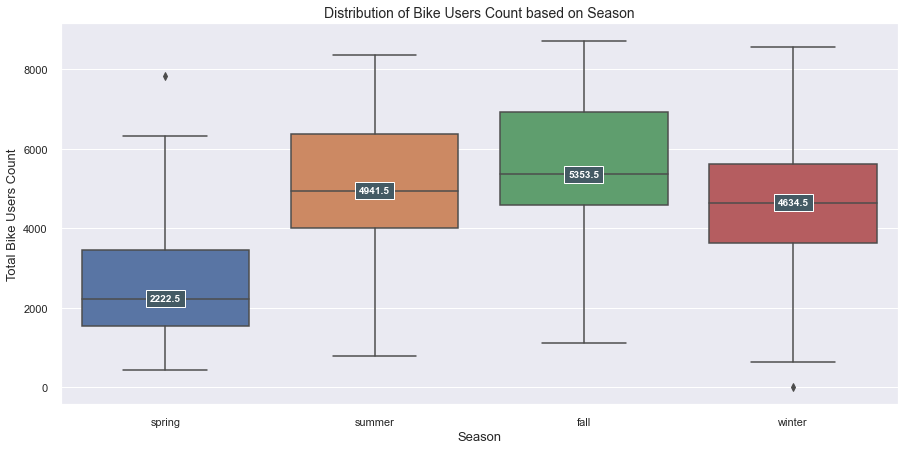

In [44]:
#Plotting boxplot for Season Columns
f,ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.title('Distribution of Bike Users Count based on Season',fontsize=14)
plt.xlabel('Season',fontsize=13)
plt.ylabel('Total Bike Users Count',fontsize=13)
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))
plt.show()

- __Fall and Summer__ seems the most popular Season for Users to rent Bike
- __Spring__ seems the least preferred season and could be because of the harsh weather

#### Analysing Weather 

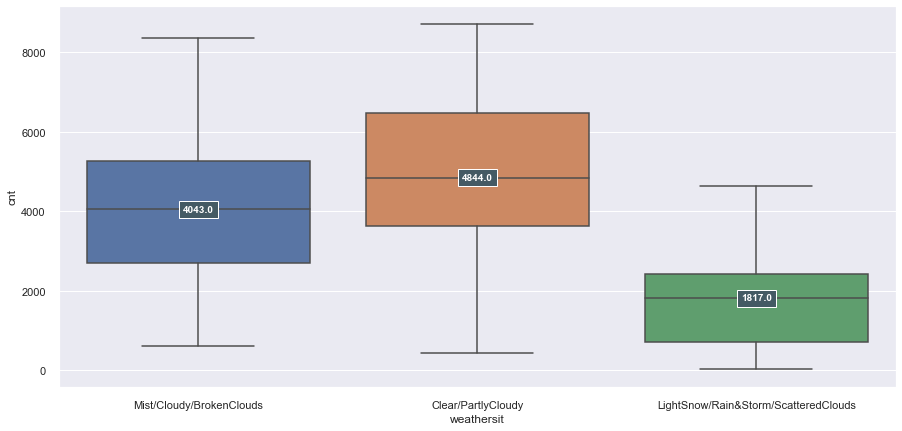

In [45]:
#Plotting boxplot for Weather Column
f,ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))
plt.show()

- __Clear and Partly Cloudy Clouds are preferred for Bike Rental for Users__
- __People avoid using Bike in Light Snow, Rain & Storm which is very obvious__

#### Analysing Bike Rental Users Monthly

In [46]:
#Create new DataFrame groupby Month and total count of Bike Users
bike_mnth_usr = pd.DataFrame(bike.groupby('mnth')['cnt'].sum())
bike_mnth_usr.reset_index(inplace=True)
bike_mnth_usr

,mnth,cnt
0,April,269094
1,August,351194
2,December,211036
3,February,149518
4,January,134933
5,July,344948
6,June,346342
7,March,228920
8,May,331686
9,November,254831


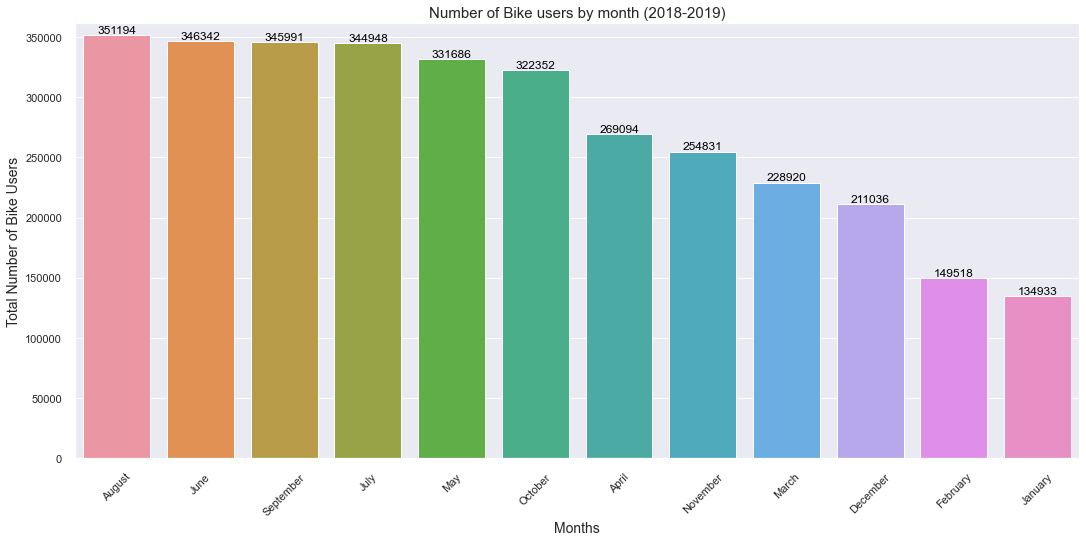

In [47]:
#Plot Total Number of Bike Users on a monthly basis
f,ax = plt.subplots(figsize=(18,8))

bike_order = bike.groupby('mnth')['cnt'].sum().sort_values(ascending=False).index.values



sns.barplot(x="mnth",y='cnt', data=bike_mnth_usr,ax=ax,order=bike_order)
plt.title('Number of Bike users by month (2018-2019)', fontsize=15)
plt.ylabel('Total Number of Bike Users',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.xticks(rotation=45)
# ylim max value to be set10
y_max = bike_mnth_usr['cnt'].max() 
ax.set_ylim([0, math.ceil(y_max)+10000])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

- June to September seems to be more preferrable months for Renting Bikes and this seems obvious as these are summer/fall months in US and people utilize this time going out more

#### Analysing Bike Users based on Month and Holiday 

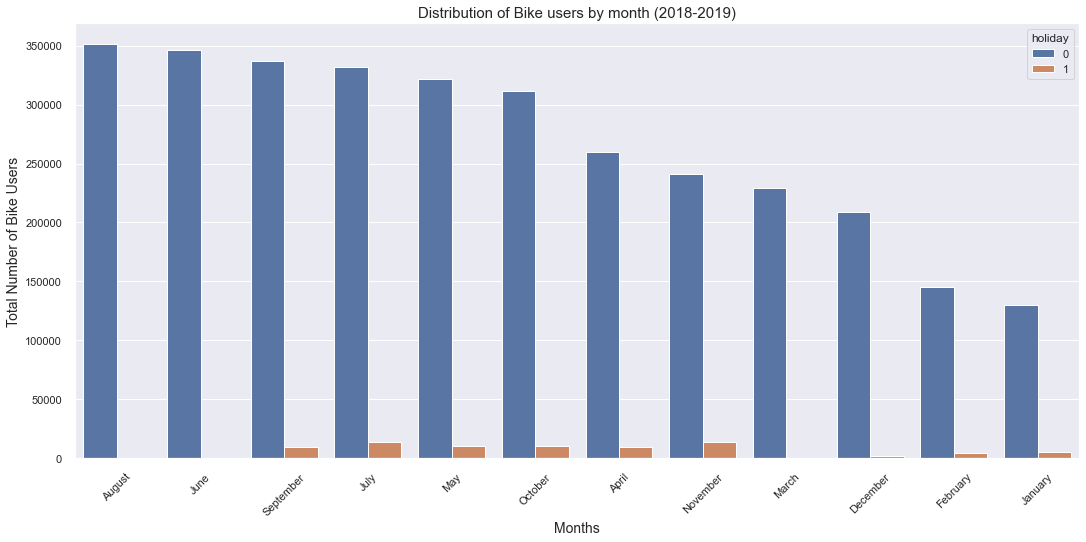

In [48]:
#Plot Total Number of Bike Users on a monthly basis
f,ax = plt.subplots(figsize=(18,8))

bike_order = bike.groupby('mnth')['cnt'].sum().sort_values(ascending=False).index.values

bike_mnth_usr = pd.DataFrame(bike.groupby(['mnth','holiday'])['cnt'].sum())
bike_mnth_usr.reset_index(inplace=True)

sns.barplot(x="mnth",y='cnt', data=bike_mnth_usr,ax=ax,order=bike_order,hue='holiday')
plt.title('Distribution of Bike users by month (2018-2019)', fontsize=15)
plt.ylabel('Total Number of Bike Users',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.xticks(rotation=45)

plt.show()

- Number of Bike Rental Users are higher on a non-holiday 

#### Analysing Bike Users based on Month and Working Day 

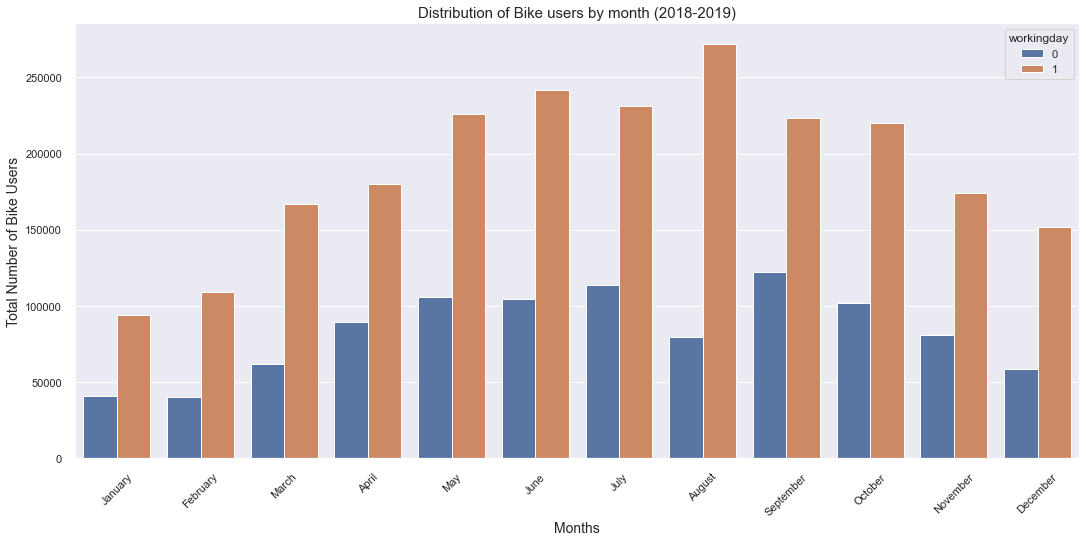

In [49]:
#Plot Total Number of Bike Users on a monthly basis
f,ax = plt.subplots(figsize=(18,8))

order = ['January','February','March','April','May','June','July','August','September','October','November','December']


bike_mnth_usr = pd.DataFrame(bike.groupby(['mnth','workingday'])['cnt'].sum())
bike_mnth_usr.reset_index(inplace=True)

sns.barplot(x="mnth",y='cnt', data=bike_mnth_usr,ax=ax,order=order,hue='workingday')
plt.title('Distribution of Bike users by month (2018-2019)', fontsize=15)
plt.ylabel('Total Number of Bike Users',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.xticks(rotation=45)

plt.show()

- The peak Bike Rental for a working day is in August

#### Analysing Bike Users based on Month and Weekend

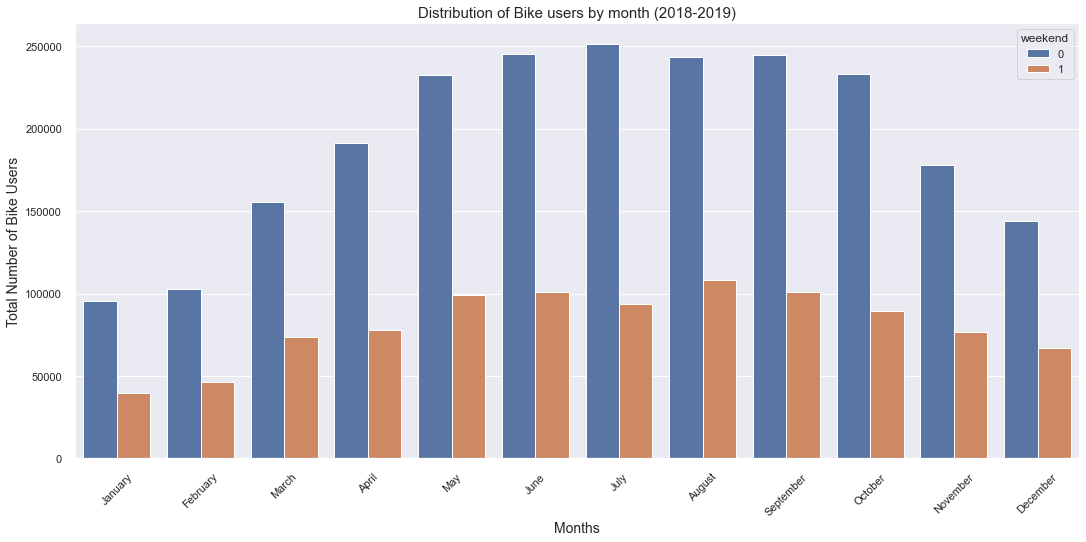

In [50]:
#Plot Total Number of Bike Users on a monthly basis
f,ax = plt.subplots(figsize=(18,8))

order = ['January','February','March','April','May','June','July','August','September','October','November','December']

bike_mnth_usr = pd.DataFrame(bike.groupby(['mnth','weekend'])['cnt'].sum())
bike_mnth_usr.reset_index(inplace=True)

sns.barplot(x="mnth",y='cnt', data=bike_mnth_usr,ax=ax,hue='weekend',order=order)
plt.title('Distribution of Bike users by month (2018-2019)', fontsize=15)
plt.ylabel('Total Number of Bike Users',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.xticks(rotation=45)

plt.show()

- Weekdays are more preferred over weekend for Bike Rides by Users for all the months

#### Analyse Weekday

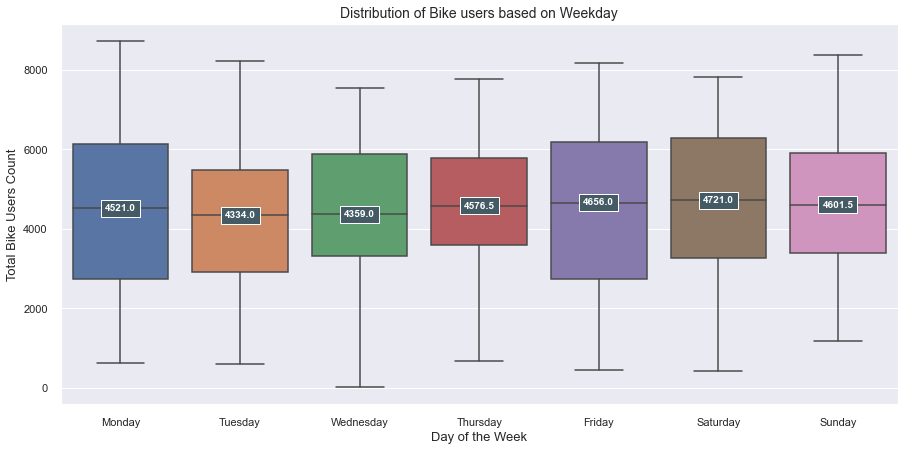

In [51]:
#Plotting boxplot for Weekday Column
f,ax = plt.subplots(figsize=(15,7))
sns.boxplot(x ='weekday', y = 'cnt', data = bike,ax=ax)
ax.set_title('Distribution of Bike users based on Weekday',fontsize=14)
ax.set_xlabel('Day of the Week', fontsize=13)
ax.set_ylabel('Total Bike Users Count', fontsize=13)
lines = ax.get_lines()
categories = ax.get_xticks()


for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))
plt.show()

- There is not much significant difference in Bike Rental users on a day to day basis. But, we do see Saturday has the highest demand and Tuesday has the lowest demand for Bike Rental Services.

#### Analysing Bike Rental users based on Month and Day

In [52]:
#Creating new DataFrame with columns as month and index as day of week
dayMonth = bike.groupby(by=['weekday','mnth']).sum()['cnt'].unstack()
dayMonth.head()

mnth,April,August,December,February,January,July,June,March,May,November,October,September
weekday,,,,,,,,,,,,
Friday,34647,60769,26163,23486,17109,46512,51309,33030,46073,37227,49543,45346
Monday,40011,41791,31949,18132,17609,47091,57094,35449,47828,34304,49006,57543
Saturday,38112,54345,33398,23028,20106,44989,50596,38170,53034,35949,44298,49370
Sunday,39483,53626,33682,23465,19572,48653,50547,35332,46008,40713,44986,51723
Thursday,36447,53374,29706,22592,23110,52598,45447,32166,50250,36362,45581,41476


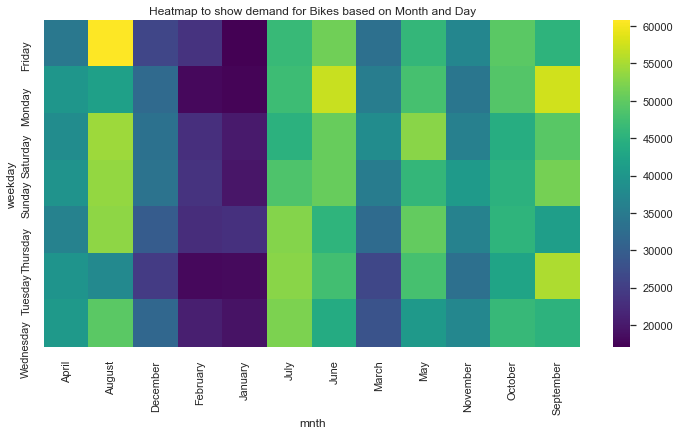

In [53]:
#Creating heatmap to show which days of the month are more demand for Bikes
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')
plt.title('Heatmap to show demand for Bikes based on Month and Day')
plt.show()

- We see a very high demand for Bikes on Friday in August
- Mondays are more popular in the month of June and September
- February and January has the lowest demands

#### Analysing Bike Rental Users based on Month and Year

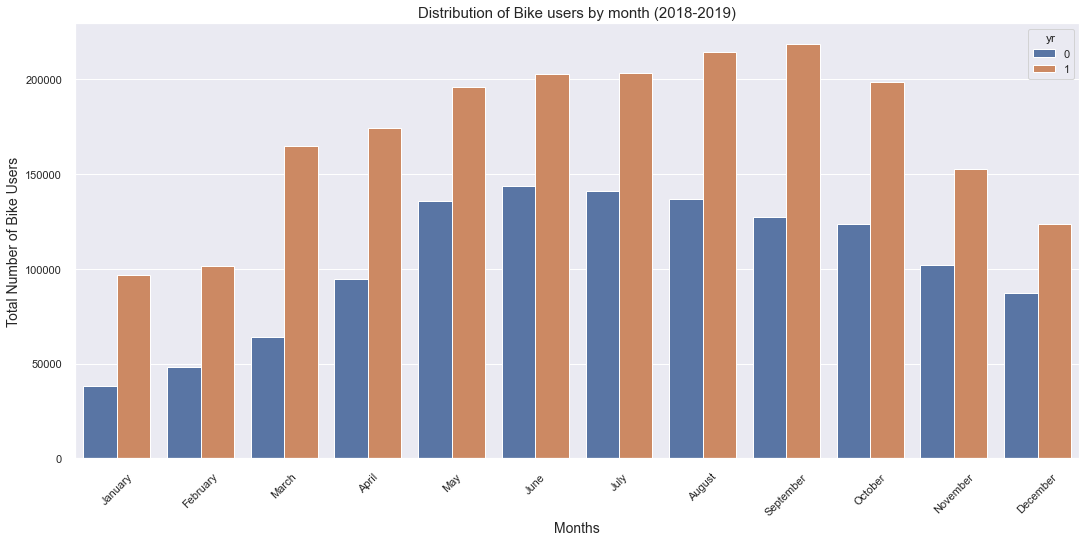

In [54]:
#Plot Total Number of Bike Users on a monthly basis
f,ax = plt.subplots(figsize=(18,8))

order = ['January','February','March','April','May','June','July','August','September','October','November','December']

bike_yr_usr = pd.DataFrame(bike.groupby(['mnth','yr'])['cnt'].sum())
bike_yr_usr.reset_index(inplace=True)

sns.barplot(x="mnth",y='cnt', data=bike_yr_usr,ax=ax,hue='yr',order=order)
plt.title('Distribution of Bike users by month (2018-2019)', fontsize=15)
plt.ylabel('Total Number of Bike Users',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.xticks(rotation=45)

plt.show()

- Year 2019 has shown an increase in the Bike Rental services for all the months

<a id=section5></a>
# Data Preparation

 - __Handling variables without a clear, ordered relationship (One Hot Encode Categorical Features)__ <br>
 Convert Categorial variables to dummy data so that the model can understand the data better
 <br/>
 
 - __Dropping Features which are redundant or identfied as of least value to the model as per EDA__

<a id=section501></a>
###  One Hot Encode Categorical Features

In [55]:
bike.columns #Check Columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'yr_mnth',
       'weekend'],
      dtype='object')

In [56]:
# Let's create dummies and drop the first column from status dataframe using 'drop_first = True'
dummy_qual_col=['season','weathersit','mnth','weekday']
status = pd.get_dummies(bike[dummy_qual_col], drop_first = True)

In [57]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, status], axis = 1)

In [58]:
bike.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'yr_mnth',
       'weekend', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_LightSnow/Rain&Storm/ScatteredClouds',
       'weathersit_Mist/Cloudy/BrokenClouds', 'mnth_August', 'mnth_December',
       'mnth_February', 'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March',
       'mnth_May', 'mnth_November', 'mnth_October', 'mnth_September',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [59]:
bike.shape #Check Bike shape

(730, 37)

<a id=section302></a>
###  Dropping unnecessary Columns

In [60]:
#Drop Original variables which were used for One Hot Encoding
bike.drop((dummy_qual_col), axis = 1, inplace = True) 

In [61]:
bike.shape  #Check Shape

(730, 33)

In [62]:
#Check info again
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   dteday                                           730 non-null    datetime64[ns]
 1   yr                                               730 non-null    int64         
 2   holiday                                          730 non-null    int64         
 3   workingday                                       730 non-null    int64         
 4   temp                                             730 non-null    float64       
 5   atemp                                            730 non-null    float64       
 6   hum                                              730 non-null    float64       
 7   windspeed                                        730 non-null    float64       
 8   cnt                                     

#### dteday - It is the Date. Since, our prediction is not based on the Date, and we already have year, month and day of week information provided in the dataset.

__atemp__ is highly correlated with __temp__ and hence needs to be dropped

__yr_mnth__ is also dropped from the list of columns as it does not add any value because Year and month are already present in the dataset

In [63]:
columnsToDrop=['dteday','atemp','yr_mnth'] #Create ColumntoDrop List

In [64]:
bike=bike.drop(columnsToDrop,axis=1)   #Drop Unnecessary Columns

<a id=section503></a>
###  Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [65]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
train_set, test_set = train_test_split(bike, train_size = 0.7, random_state = 100)
print ('Train Data Shape: ',train_set.shape)
print ('Test Data Shape: ',test_set.shape)

Train Data Shape:  (510, 30)
Test Data Shape:  (220, 30)


<a id=section504></a>
### Rescaling the Features 

Here we can see that bike dataset has some variables with many ranging values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are many common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 
3. Robust Scaling

We will choose StandardScaler to scale our dataset as the data looks normally distributed


In [66]:
scaler=StandardScaler()  #Create an instance of StandardScaler class

In [67]:
columnsToScale=['temp', 'hum', 'windspeed','cnt']  #Create list of columns to be scaled

In [68]:
train_set_Scaled = scaler.fit_transform(train_set[columnsToScale]) #Fit and Transform the Columns

In [69]:
train_set_Scaled.shape

(510, 4)

In [68]:
train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale]) #Fit and Transform the Columns

In [69]:
train_set[columnsToScale].describe()   #Check Scaled columns details

,temp,hum,windspeed,cnt
count,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02
mean,-2.746169e-16,-2.166023e-16,9.523972e-18,1.493359e-16
std,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00
min,-2.381884e+00,-4.464419e+00,-1.891589e+00,-2.290356e+00
25%,-8.756866e-01,-7.675694e-01,-7.174407e-01,-7.006211e-01
50%,2.285273e-02,2.219277e-02,-1.421889e-01,2.291863e-02
75%,8.765214e-01,7.161828e-01,5.515521e-01,7.636488e-01
max,2.050027e+00,2.398847e+00,4.003357e+00,2.169933e+00


In [70]:
train_set.info()   #Check Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   yr                                               510 non-null    int64  
 1   holiday                                          510 non-null    int64  
 2   workingday                                       510 non-null    int64  
 3   temp                                             510 non-null    float64
 4   hum                                              510 non-null    float64
 5   windspeed                                        510 non-null    float64
 6   cnt                                              510 non-null    float64
 7   weekend                                          510 non-null    int64  
 8   season_spring                                    510 non-null    uint8  
 9   season_summer                 

<a id=section505></a>
### Dividing into X and Y sets for the model building

In [71]:
y_train = train_set.pop('cnt')
X_train = train_set

In [72]:
X_train.shape

(510, 29)

<a id=section6></a>
# Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [73]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()


In [74]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          3.00e-181
Time:                        17:04:01   Log-Likelihood:                -235.53
No. Observations:                 510   AIC:                             527.1
Df Residuals:                     482   BIC:                             645.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for many columns are high with a p-value ranging to 0.9
The coefficient is statistically insignificant. So the association for such features is purely by chance.

##### 2. R - squared is 0.853
Meaning that 85.3% of the variance in `Count` is explained by `29 Features`

This is a decent R-squared value inclusive of all the features.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

This is the __First Model Built__ with all the __Features__ and below are few points to remember:

- The R-squared value obtained is 0.853 which is very good. But, Since we have 29 predictor variables, we can clearly see variables are having p_value >0.05 which means many variables are insignificant and could have multicollinearity. So let's go ahead and start removing variables.

- We have to remove variable one by one to understand the affect on the other variables

- The below approach will be time taking and will consider all 29 variables 

As you can see there are strong Multicollinearity affects in the model and it affects the following:

- __Interpretation of variables__ <br>
  Does “change in Y when all others are held constant” apply?
- __Inference__  <br>
  Coefficients swing wildly, signs can invert.<br>
<br>

__We will use a combination of p-values and VIF to handle multicollinearity and drop features which are having p-value > 0.05 and/or VIF > 5__

<a id=section601></a>
###  Build a Manual Model

The Model was run again by dropping feature one by one and below are the final list of Features which needs to be dropped

In [75]:
#After dropping feature one by one, we came across the below features which can be dropped
drop_x = ['mnth_March','weekday_Saturday','workingday','mnth_June','mnth_October','weekend','weekday_Monday'
         ,'weekday_Sunday','mnth_August','weekday_Thursday','mnth_May','weekday_Wednesday','mnth_February',
         'mnth_November','mnth_December','mnth_January']

In [76]:
# Removing feature 
X_train_1 = X_train.drop(drop_x,axis=1)


In [77]:
# Build a linear model

import statsmodels.api as sm
X_train_1 = sm.add_constant(X_train_1)

lr_2 = sm.OLS(y_train, X_train_1).fit()


In [78]:
# Print a summary of the linear regression model obtained
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.8
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.12e-192
Time:                        17:04:01   Log-Likelihood:                -245.36
No. Observations:                 510   AIC:                             518.7
Df Residuals:                     496   BIC:                             578.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

-  Dropping 16 features only dropped R-Squared value from .853 to .850 which shows all dropped features were redundant
-  All other Features are statisticaly significant as they have p-value <0.05

In [79]:
X_train_new = X_train_1.drop(['const'], axis=1)

__Checking the variance inflation factor (VIF)__
- Sometimes, pairwise correlations are not enough.
- Instead of just one variable, the independent variable may depend upon a combination of other variables.
- VIF calculates how well one independent variable is explained by all the other independent variables combined.

In [80]:
# Calculate the VIFs for the Manual model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.50
5,season_spring,2.44
9,weathersit_Mist/Cloudy/BrokenClouds,2.13
0,yr,2.00
3,hum,1.78
7,season_winter,1.72
6,season_summer,1.46
10,mnth_July,1.41
8,weathersit_LightSnow/Rain&Storm/ScatteredClouds,1.24
11,mnth_September,1.19


#### All the p-values are below 0.05 and the VIF is well under 3 which is very good

In [81]:
#Plot the Coeffecients
pd.DataFrame({
     
    'Coeffecient':lr_2.params
}).round(decimals=2).sort_values('Coeffecient',ascending=False).style.bar(color=['grey','lightblue'],align='zero')


,Coeffecient
yr,1.020000
temp,0.530000
season_winter,0.440000
mnth_September,0.370000
season_summer,0.240000
hum,-0.110000
windspeed,-0.140000
weekday_Tuesday,-0.200000
mnth_July,-0.240000
season_spring,-0.250000


Now we have ran our first model and also removed the multicollinearity. Let's compare <br>

| Features   |  Base model  |          Manual model                                    |
| ------------- |:------------- | :----------------------- :|
| Total Variables   | 29         | 13 |
| R-squared          | .853         | .847                                | 
| Adjusted R-squared | .844         |  .843|
| F-Statistics       |103.2         | 210.8|

As you can see __Manual Model__ has not dropped R-Squared value significantly even after dropping 16 features from the __Base Model__. 

The difference between Adjusted R-Squared and R-Squared value has dropped compared to __Base Model__ which shows we have removed insignificant and redundant variables from the list.<br>

We will use the Manual Model to __evaluate our analysis__ on the __Test Data__

<a id=section602></a>
###  Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [82]:
y_train_pred = lr_2.predict(X_train_1) #Predict the Train Data

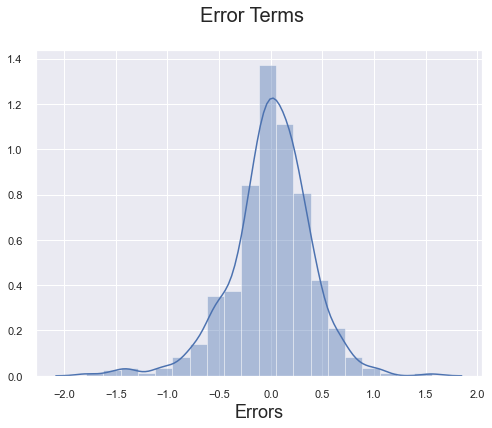

In [83]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(8,6))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

 - The error terms looks __normally distributed__

<a id=section603></a>
###  Making Predictions Using the Manual Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. Manual model.

#### Applying the scaling on the test sets

We only use 'Transform' while applying scaling on the Test Dataset

In [84]:
test_set[columnsToScale] = scaler.transform(test_set[columnsToScale]) #Applying Standardization to Test Data

In [85]:
test_set[columnsToScale].describe()  #Check details after Standardization

,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000
mean,0.094304,-0.084140,-0.044745,0.038600
std,1.033465,1.020528,0.940739,0.977532
min,-2.175395,-2.666825,-2.143940,-2.075347
25%,-0.806655,-0.832398,-0.719418,-0.601712
50%,0.091882,-0.170826,-0.122362,0.049859
75%,0.968557,0.640461,0.482415,0.732603
max,1.980997,2.413579,2.868429,2.006239


#### Dividing into X_test and y_test

In [86]:
#Divide into X_test and y_test
y_test = test_set.pop('cnt')
X_test = test_set

In [87]:
# Adding constant variable to test dataframe
X_test_m2 = sm.add_constant(X_test)

In [88]:
# Creating X_test_m2 dataframe by dropping variables from X_test_m2

X_test_m2 = X_test_m2.drop(drop_x, axis = 1)

In [89]:
#Making predictions using the second model

y_pred_m2 = lr_2.predict(X_test_m2)

<a id=section604></a>
### Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [90]:
# calculate these metrics by hand for Training Data
from sklearn import metrics

print('Training MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Training MSE:', metrics.mean_squared_error(y_train, y_train_pred))
print('Training RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Training MAE: 0.2867940663363884
Training MSE: 0.1532520524488084
Training RMSE: 0.39147420406561706


In [91]:
# calculate these metrics by hand for Testing Data
from sklearn import metrics

print('Testing MAE:', metrics.mean_absolute_error(y_test, y_pred_m2))
print('Testing MSE:', metrics.mean_squared_error(y_test, y_pred_m2))
print('Testing RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m2)))

Testing MAE: 0.3104609561562322
Testing MSE: 0.17390402318767226
Testing RMSE: 0.41701801302542346


#### The errors does not vary much between Training and Testing dataset which __confirms the model__ is __not underfitting or overfitting__.

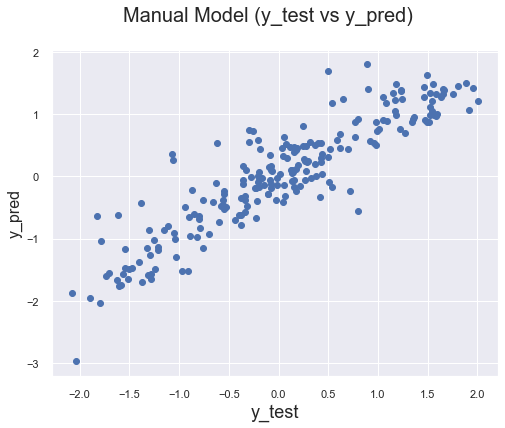

In [92]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_m2)
fig.suptitle('Manual Model (y_test vs y_pred)', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     # Plotting y_test and y_pred to understand the spread
plt.show()

- __The error has a constant variance__

In [93]:
#Check the R-2 Score on the Test Dataset based on Manual Model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m2)

0.8171790137974614

#### The R-Squared value on Test data is decent and good 

<a id=section7></a>

# Building model with RFE (Recursive feature elimination)

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

- The goal of Recursive Feature Elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

- RFE is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted.

In [94]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [95]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [96]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekend', False, 10),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_LightSnow/Rain&Storm/ScatteredClouds', True, 1),
 ('weathersit_Mist/Cloudy/BrokenClouds', True, 1),
 ('mnth_August', True, 1),
 ('mnth_December', True, 1),
 ('mnth_February', True, 1),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 7),
 ('mnth_March', False, 9),
 ('mnth_May', True, 1),
 ('mnth_November', True, 1),
 ('mnth_October', False, 6),
 ('mnth_September', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 8),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 4),
 ('weekday_Tuesday', False, 2),
 ('weekday_Wednesday', False, 3)]

In [97]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_LightSnow/Rain&Storm/ScatteredClouds',
       'weathersit_Mist/Cloudy/BrokenClouds', 'mnth_August', 'mnth_December',
       'mnth_February', 'mnth_January', 'mnth_July', 'mnth_May',
       'mnth_November', 'mnth_September', 'weekday_Monday'],
      dtype='object')

<a id=section701></a>
###  Building RFE model

In [98]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [99]:
# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

In [100]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [101]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.4
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          5.23e-188
Time:                        17:04:03   Log-Likelihood:                -236.95
No. Observations:                 510   AIC:                             515.9
Df Residuals:                     489   BIC:                             604.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

__We picked top 20 attributes using RFE and now we will use again manual approach to eliminate features with multicollinearity in order to have a better model__

In [102]:
X_train_new_rfe = X_train_rfe.drop(['const'], axis=1)

In [103]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_spring,5.02
2,workingday,5.00
3,temp,4.33
8,season_winter,3.44
7,season_summer,3.15
14,mnth_January,2.55
10,weathersit_Mist/Cloudy/BrokenClouds,2.36
0,yr,2.10
11,mnth_August,2.01
13,mnth_February,1.98


#### We need to now apply manual approach on the above list of columns and drop columns one by one after checking p-values and VIF 

After performing manual approach below features were selected to finally drop from the list

In [104]:
drop_x = ['mnth_August','mnth_May','mnth_February','holiday','mnth_December','mnth_November','mnth_January'] #Create list of features to Drop

In [105]:
X_train_new_rfe = X_train_rfe.drop(drop_x, axis = 1) #Drop Features

In [106]:
# Adding a constant variable 
X_train_2 = sm.add_constant(X_train_new_rfe)

In [107]:
lm_rfe = sm.OLS(y_train,X_train_2).fit()   # Running the linear model

In [108]:
#Let's see the summary of our linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.54e-191
Time:                        17:04:03   Log-Likelihood:                -247.41
No. Observations:                 510   AIC:                             522.8
Df Residuals:                     496   BIC:                             582.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [109]:
X_train_new_rfe = X_train_new_rfe.drop(['const'], axis=1)  #Drop Constant

In [110]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,3.79
5,season_spring,3.39
2,temp,2.83
7,season_winter,2.30
9,weathersit_Mist/Cloudy/BrokenClouds,2.27
0,yr,2.03
6,season_summer,1.96
3,hum,1.84
12,weekday_Monday,1.64
10,mnth_July,1.44


#### All the p-values are below 0.05 and the VIF is well under 4, so we can stop now

In [111]:
#Plot the Coeffecients
pd.DataFrame({
     
    'Coeffecient':lm_rfe.params
}).round(decimals=2).sort_values('Coeffecient',ascending=False).style.bar(color=['grey','lightblue'],align='zero')


,Coeffecient
yr,1.030000
temp,0.530000
season_winter,0.440000
mnth_September,0.360000
weekday_Monday,0.280000
season_summer,0.240000
workingday,0.230000
hum,-0.100000
windspeed,-0.140000
mnth_July,-0.240000


In [112]:
y_train_price_rfe = lm_rfe.predict(X_train_2) #Predict the Train set

In [113]:
y_train_price_rfe.shape  #Check the shape

(510,)

<a id=section702></a>
###  Residual Analysis of the train data

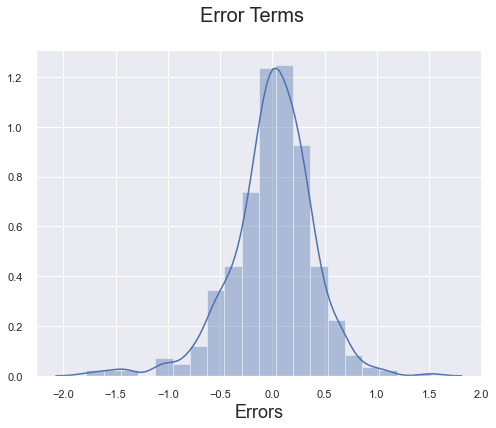

In [114]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(8,6))
sns.distplot((y_train - y_train_price_rfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

- __The errors are normally distributed__

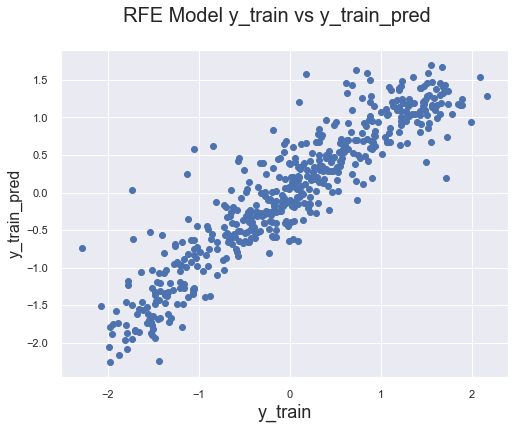

In [115]:
# Plotting y_train and y_train_pred to understand the spread

fig = plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_price_rfe)
fig.suptitle('RFE Model y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16)     # Plotting y_test and y_pred to understand the spread
plt.show()

<a id=section703></a>
###  Making Predictions Using the RFE Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the RFE model.

In [116]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_new_rfe.columns]

In [117]:
# Adding constant variable to test dataframe
X_test_rfe = sm.add_constant(X_test_rfe)

In [118]:
X_test_rfe.shape

(220, 14)

In [119]:
# Making predictions using the RFE model

y_pred_rfe = lm_rfe.predict(X_test_rfe)

<a id=section704></a>
### Model Evaluation

In [120]:
# calculate these metrics by hand for Training Data
from sklearn import metrics

print('Training MAE:', metrics.mean_absolute_error(y_train, y_train_price_rfe))
print('Training MSE:', metrics.mean_squared_error(y_train, y_train_price_rfe))
print('Training RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_price_rfe)))

Training MAE: 0.2868732512276536
Training MSE: 0.15448800568488777
Training RMSE: 0.39304962242048747


In [121]:
# calculate these metrics by hand for Testing Data
from sklearn import metrics

print('Testing MAE:', metrics.mean_absolute_error(y_test, y_pred_rfe))
print('Testing MSE:', metrics.mean_squared_error(y_test, y_pred_rfe))
print('Testing RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))) 

Testing MAE: 0.311558768633094
Testing MSE: 0.17340220476834015
Testing RMSE: 0.41641590359680086


#### The errors does not vary much between Training and Testing dataset which __confirms the model__ is __not underfitting or overfitting__.

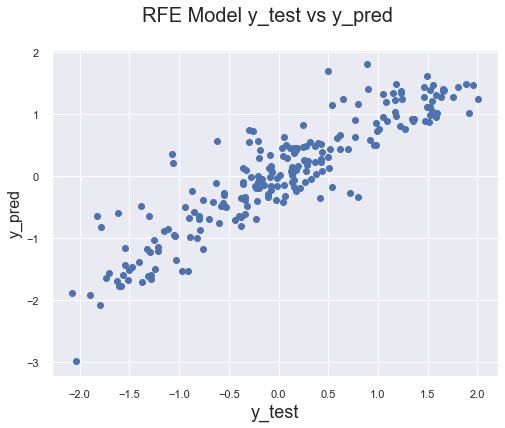

In [122]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rfe)
fig.suptitle('RFE Model y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     # Plotting y_test and y_pred to understand the spread
plt.show()

- __The error terms have constant variance and follows homoscedasticity__

In [123]:
#Check the R-2 Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rfe)

0.8177065630550073

#### The R-Squared value on Test data is decent and good 

<a id=section8></a>
## Model Comparison 

As we can see, we were able to generate models by using the Manual Approach and also by RFE Approach (RFE + Manual). <br>
Now we have ran our model (Manual approach vs RFE Approach). Let's compare the results <br>

| Features   | Manual model  |         RFE model                                    |
| ------------- |:------------- | :----------------------- :|
| Total Variables   | 13         | 13 |
| R-squared   (Train)       | .847       | .846                                | 
| R-squared   (Test)       | .817       | .817                                | 
| Adjusted R-squared | .843       |  .841|
| RMSE(train data)  | 0.39        |    0.39                                       | 
| RMSE(test data)  | 0.41        |    0.41                                       | 
|MAE(train data) |   0.28                      |0.28 |
|MAE(test data) |   0.31                      |0.31 |
|MSE(train data)  |   0.15                    | 0.15|
|MSE(test data)  |   0.17                    | 0.17|

- Both above Models behave almost exactly the same and the results dont vary much
- RFE Model is much faster compared to the Manual Model as lot of time was spent removing features with higher multicollinearity 
- Manual Model does score __tiny better R-Square and Adjusted R-Squared__ than RFE Model but its not that significant comparing the efforts put in both the models.


We can see that the equation of our best fitted line is:
<div class="alert alert-block alert-warning">
    
$ cnt= 1.03 \times  yr  + 0.53  \times  temp + 0.44  \times  seasonwinter + 0.36 \times mnthSeptember + 0.28 \times weekdayMonday + 0.24 \times seasonSummer + 0.23 \times workingday  - 1.09 \times weathersitLightSnow/Rain\&Storm/ScatteredClouds - 0.25 \times weathersitMist/Cloudy/BrokenClouds - 0.25 \times seasonSpring - 0.24 \times mnthJuly - 0.14 \times windspeed - 0.10 \times hum - 0.72 $

</div>
<h4>We can read the above as keeping all the variables constant 1 unit increase in Year can increase the Total Bike Rental user Count  by 1.03 units </h4>


<a id=section9></a>
## FINAL VERDICT ON THE MODEL

- Above is the comparison of Manual vs RFE models which have ran on the bike dataset.
- Both Model behaves exactly the same with almost same results.
- Manual Model does take a lot of time in comparison with the RFE Model.

**Overall keeping in mind the below parameters**
   - Time to run the model 
   - Features involved in the model
   - R-square of the model
   - RMSE of the model

<div class="alert alert-block alert-success">
<h2> Any of the above model can be used but the model with RFE turns out to be the best model for our dataset considering it gives the same Result with a much faster speed</h2>
</div>

__Overall we have a decent model but we also acknowledge that we could still do better.__ 

Below are the few areas where we could improve our Model:
1. More Feature Engineering
  - Add new features (E.g.Hour, User Profile, States etc..)
2. Try other Regression techniques
3. Variable transformations like Principal component analysis 
4. More sophisticated Feature Selection Techniques required

<a id=section10></a>
##  __CONCLUSION__ 

Now lets look back at the problem statments and answers which needs to be provided to the customer/business.
<br>
- Essentially, the company wants:

  - To identify which variables are significant in predicting the demand for shared bikes
  - To know how well those variables describe the bike demands

The model provides insights based on the BoomBikes Dataset and here are the recommendations/answers provided based on the choosen model above (RFE Model):



### To identify the variables significant in predicting the demand for shared bikes :
- We are very confident about some relationship between the probability of Bike Rental demand and below are listed based on the ranks of their impact
  - Year
  - Temperature
  - Season - Winter 
  - Month - September
  - Weekday - Monday
  - Season - Summer 
  - Working Day
            
- Some Relationship cause decline in Bike Rental demand and below are the following:
  - Weather - LightSnow/Rain&Storm/ScatteredClouds
  - Weather - Mist/Cloudy/BrokenClouds
  - Season - Spring
  - Month - July
  - WindSpeed
  - Humidity
  

    
### To know how well those variables describe the bike demands
- As the data was scaled we can infer the following:
    
$ cnt= 1.03 \times  yr  + 0.53  \times  temp + 0.44  \times  seasonwinter + 0.36 \times mnthSeptember + 0.28 \times weekdayMonday + 0.24 \times seasonSummer + 0.23 \times workingday  - 1.09 \times weathersitLightSnow/Rain\&Storm/ScatteredClouds - 0.25 \times weathersitMist/Cloudy/BrokenClouds - 0.25 \times seasonSpring - 0.24 \times mnthJuly - 0.14 \times windspeed - 0.10 \times hum - 0.72 $

***We can read the above as keeping all the variables constant 1 unit increase in Temperature can increase the Bike Rental Demand  by 0.48 units***

#### Let's discuss more in Details how the above variables/factors impact the Bike Rental Services
- __Year__ : Based on the data pattern, we expect the demand for Bike Rental Services to increase for coming Year as well. But, it is only as good as the trend observed and does not guarantee the same.

- __Temperature__ : We see increase in Temperature causes an Increase in Bike Demand. As United states has various kinds of climates depending on the region you live. But, most of the US states face harsh climatic conditions like snow and thunderstorms, it means summer and falls are pleasant and an increase in temperature could motivate people to opt for Bike Rental Services.

- __Season__ : The demand seems to be more in Winter and Summer Seasons in comparison with the Fall Season. The demand is fairly low in Spring Season in comparison with the Fall Season. 

- __Month__ : The demand seems to be more in September month in comparison with the April Month. The demand is fairly low in July in comparison with April Month. The Rest of the months shows no variation in demand.

- __Weekday__ : The demand seems to be higher on Monday in comparison with Friday. The rest of the days of the week show no variations in demand.

- __Working Day__: There seems to be high demand from people who are working and use it mostly for their office commute or day-to-day activities. With the increase in traffic and health problems now-a-days, people might be opting for Bikes to improve their overall health and also avoid heavy traffic jams.

- __Weather__ : The demand seems to be low in Mist/Cloudy/BrokenClouds Weather and LightSnow/Rain&Storm/ScatteredClouds Weather in comparison with Clear and Partly Clouds Weather.

- __Humidity__ - Increase in Humidity causes lower demand as it becomes painful and exhausting to use Bike in high Humid conditions.

- __Windspeed__ - Increase in Windspeed defintely affects the Bike demand as it might not be safe to drive a bike on a windy day.

### BoomBikes should consider the above factors on which the demand for these shared bikes depends and can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations
    

<a id=section11></a>
<div class="alert alert-block alert-success">
<h2>Recommendations</h2>
</div>

### Based on the EDA and Model build above, following recommendations are suggested to BoomBikes:

- Provide special offers to Customers especially in the months when the demand is low.
- Take a initiative to start some monthly, quartely or annual subscription at a very attractive prices especially for Working Professionals/Students which can create more demand for regular use of Bike Rental Services.
- Apply special offer on weekends which can also increase the demands for Bike.
- Keep an eye on temperature, humidity and windspeed in the region to forecast the demands. 
- Can work on a business model to lease out unused Bikes in Off-Season to Users who might be interested to use Bikes indoors or in their neighborhood or locality only. 
- More analysis can be done by adding more data related to hourly Rental data to extract more insights and can create more specific subscription packages.
- More analysis can be done of User profile to target specific customers based on the needs.
